In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#training data gerneration
m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4


In [7]:
g = 0.8*x1 + x2 - 3
C1 = np.where(g >= 1)
C0 = np.where(g < -1)
print(C1)

(array([10, 13, 18, 19, 22, 23, 27, 30, 32, 33, 34, 39, 41, 44, 45, 46, 49,
       54, 56, 58, 71, 73, 75, 80, 83, 84, 87, 89, 91, 94], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [8]:
C1 = np.where(g >= 1)[0]
C0 = np.where(g < -1)[0]
print(C1.shape)
print(C0.shape)

(30,)
(39,)


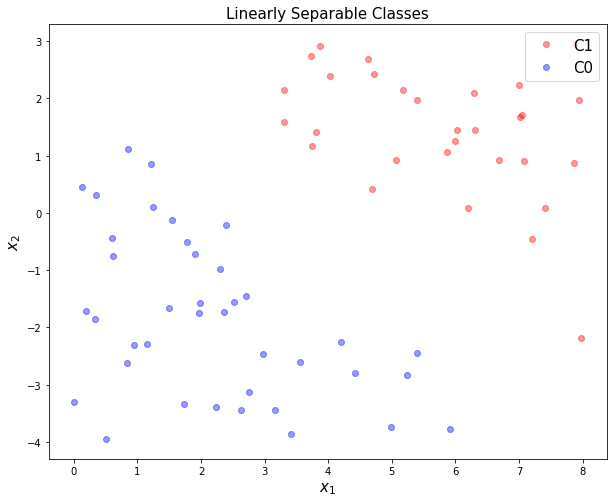

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.title('Linearly Separable Classes', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

In [14]:
N = C1.shape[0]
M = C0.shape[0]
print(N)
print(M)

30
39


In [16]:
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([N ,1]), -np.ones([M,1])])

X = np.asmatrix(X) 
y = np.asmatrix(y)

In [32]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = N+M

for _ in range(20):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]:
            w= w+y[i,0]*X[i,:].T


print(w)

[[-24.       ]
 [  7.7032329]
 [ 13.2176153]]


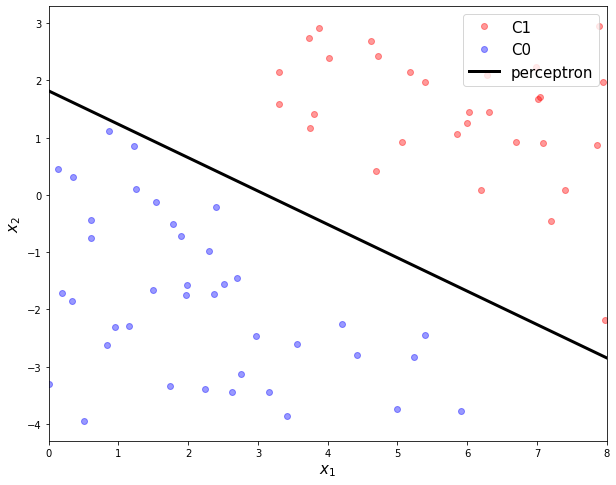

In [33]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()

In [36]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([N,1]), -np.ones([M,1])])

In [37]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
clf.predict([[3, -2]])

array([-1.])

In [39]:
clf.predict([[6, 2]])

array([1.])

In [40]:
clf.coef_

array([[5.82714023, 8.43854094]])

In [41]:
clf.intercept_

array([-19.])

In [42]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

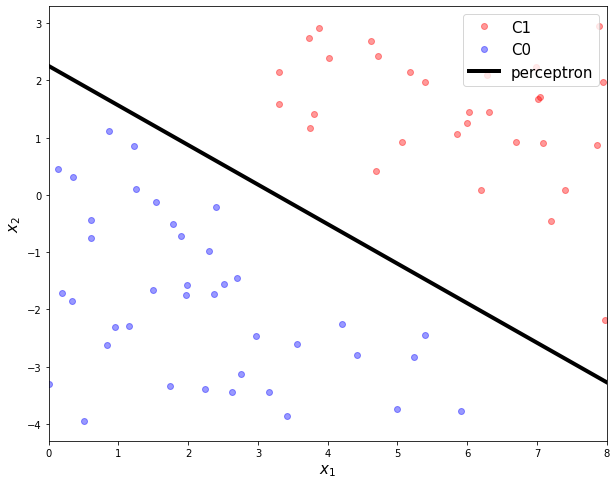

In [43]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1/w2*x1p - w0/w2

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(x1p, x2p, c = 'k', linewidth = 4, label = 'perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()
